In [68]:
from keras import backend as K
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense,GlobalAveragePooling2D,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# Transfer Learning
- 기존의 만들어진 모델을 사용
    - 그냥 모델의 구조만 가지고오거나
    - 다른 레이어를 고정시키고 일부분 layer를 조정
    - weight의 초기 값들을 가지고온다거나

In [3]:
model = load_model('./cnn.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


C:\ProgramData\Anaconda3\envs\tmh_env\lib\site-packages\keras\engine\saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [4]:
model.layers

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

# Freeze layer

In [47]:
model.layers

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

C:\ProgramData\Anaconda3\envs\tmh_env\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [51]:
mnist_cnn_feature = Sequential(model.layers[:5])
for layer in mnist_cnn_feature.layers:
    layer.trainable = False

In [55]:
mnist_cnn_feature.summary()
print(f'intput : {mnist_cnn_feature.input}\n output : {mnist_cnn_feature.output} ')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
Total params: 18,816
Trainable params: 0
Non-trainable params: 18,816
_________________________________________________________________
intput : Tensor("conv2d_1_input_6:0", shape=(?, 28, 28, 1), dtype=float32)
 output : Tensor("flatten_1_6/Reshape:0", shape=(?, ?), dtype=f

In [63]:
num_classes = 10
ll = mnist_cnn_feature.output
ll = Dense(128, name = 'add_Dense')(ll)
ll = Dropout(0.5, name = 'add_Drop')(ll)
ll = Dense(num_classes,activation="softmax", name = 'add_soft')(ll)

new_model = Model(inputs=mnist_cnn_feature.input,outputs=ll)

In [53]:
mnist_cnn_feature.output

<tf.Tensor 'flatten_1_6/Reshape:0' shape=(?, ?) dtype=float32>

In [67]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
add_Dense (Dense)            (None, 128)               1179776   
__________

In [85]:
for layer in new_model.layers:
    print(f'layer name : {layer} trainable : {layer.trainable}')

layer name : <keras.engine.input_layer.InputLayer object at 0x000000002F0D9278> trainable : False
layer name : <keras.layers.convolutional.Conv2D object at 0x000000000F2452E8> trainable : False
layer name : <keras.layers.convolutional.Conv2D object at 0x000000000F245A90> trainable : False
layer name : <keras.layers.pooling.MaxPooling2D object at 0x000000000F37E198> trainable : False
layer name : <keras.layers.core.Dropout object at 0x000000000F245860> trainable : False
layer name : <keras.layers.core.Flatten object at 0x000000000F37ED30> trainable : False
layer name : <keras.layers.core.Dense object at 0x000000002F28DDA0> trainable : True
layer name : <keras.layers.core.Dropout object at 0x000000002F28D438> trainable : True
layer name : <keras.layers.core.Dense object at 0x0000000033B916A0> trainable : True


# input data load(MNIST)

In [70]:
img_rows = 28
img_cols = 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# compile and learning

In [76]:
new_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

log = new_model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=1, validation_data=(x_test, y_test))
score = new_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 32s 527us/step - loss: 0.0282 - acc: 0.9910 - val_loss: 0.0387 - val_acc: 0.9887
Epoch 2/12
60000/60000 [==============================] - 31s 513us/step - loss: 0.0260 - acc: 0.9920 - val_loss: 0.0370 - val_acc: 0.9893
Epoch 3/12
60000/60000 [==============================] - 31s 514us/step - loss: 0.0259 - acc: 0.9919 - val_loss: 0.0376 - val_acc: 0.9891
Epoch 4/12
60000/60000 [==============================] - 31s 516us/step - loss: 0.0266 - acc: 0.9915 - val_loss: 0.0398 - val_acc: 0.9893
Epoch 5/12
60000/60000 [==============================] - 31s 515us/step - loss: 0.0262 - acc: 0.9916 - val_loss: 0.0363 - val_acc: 0.9898
Epoch 6/12
60000/60000 [==============================] - 31s 516us/step - loss: 0.0257 - acc: 0.9920 - val_loss: 0.0347 - val_acc: 0.9893
Epoch 7/12
60000/60000 [==============================] - 31s 512us/step - loss: 0.0257 - acc: 0.9919 - val_loss: 0.

In [73]:
def show_results(*logs):
    trn_loss, val_loss, trn_acc, val_acc = [],[],[],[]
    
    for log in logs:
        trn_loss += log.history['loss']
        val_loss += log.history['val_loss']
        
    fig, ax = plt.subplots(figsize = (8,4))
    # loss value
    ax.plot(trn_loss, label = 'train')
    # accuracy
    ax.plot(val_loss, label = 'validation')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend()

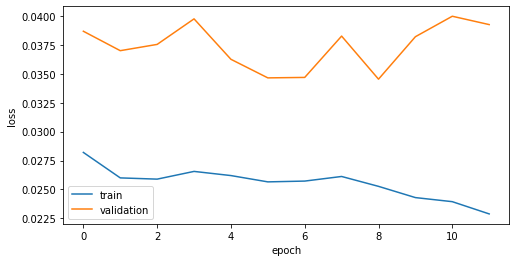

In [77]:
show_results(log)